# **Visualizing Measurement Results**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#path:
RESULT_PATH = "../results/medium/"

In [86]:
iongs = pd.read_csv(RESULT_PATH+"iong.csv")
distances = pd.read_csv(RESULT_PATH+"distances.csv")

Text(0, 0.5, 'IONG [edges]')

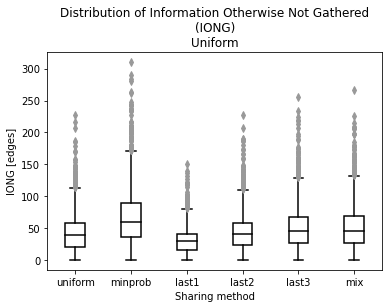

In [87]:
iongs_ = iongs[iongs["uniform"] > -1]
iongs_ = iongs_.drop(columns=["id"])
ax = sns.boxplot(data=iongs_, width=0.35, color="white", saturation=1.0)

plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Information Otherwise Not Gathered\n(IONG)\nUniform")
plt.xlabel("Sharing method")
plt.ylabel("IONG [edges]")

In [88]:
iongs_.describe()

,uniform,minprob,last1,last2,last3,mix
count,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000
mean,42.428015,66.320166,30.201663,43.072505,50.075624,50.575884
std,27.800592,41.419734,19.250929,26.958964,31.555444,32.479438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,36.000000,15.000000,23.000000,27.000000,27.000000
50%,39.000000,60.000000,29.000000,40.000000,46.000000,46.000000
75%,58.000000,90.000000,41.000000,58.000000,68.000000,69.000000
max,228.000000,310.000000,151.000000,227.000000,256.000000,266.000000


Text(0, 0.5, 'Incorrectness [edges]')

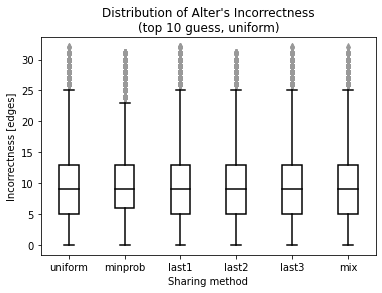

In [89]:
ax = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

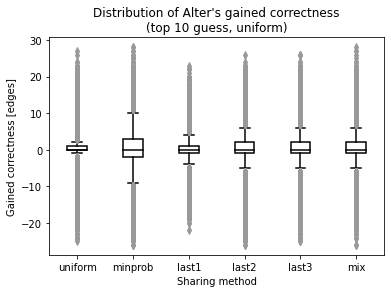

In [90]:
ax = sns.boxplot(x="method", y="Distance difference", data=distances, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [91]:
best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]

Text(0, 0.5, 'Incorrectness [edges]')

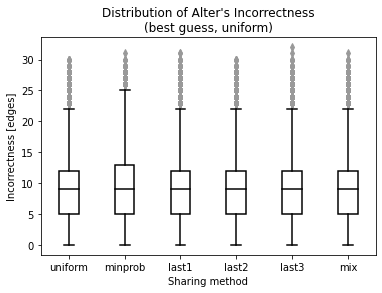

In [92]:
ax = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

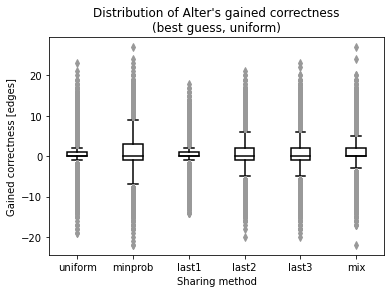

In [94]:
ax = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [40]:
best_guesses.describe()

,id,Alter correctness\ndistance [m]
count,5640.000000,5640.000000
mean,247.269149,9.144149
std,142.446491,5.548698
min,1.000000,0.000000
25%,130.000000,5.000000
50%,240.000000,9.000000
75%,358.000000,12.000000
max,499.000000,30.000000


---
## **Summarizing multiple results**

In [2]:
uniforms = [["low_uniform/", "low traffic, uniform origin"],
            ["medium_uniform/", "medium traffic, uniform origin"],
            ["high_uniform/","high traffic, uniform origin"]]
stationaries = [["low/", "low traffic, stationary origin"],
                ["medium/", "medium traffic, stationary origin"],
                ["high/","high traffic, stationary origin"]]

In [3]:
#path:
RESULT_PATH = "../results/no_arteria/"

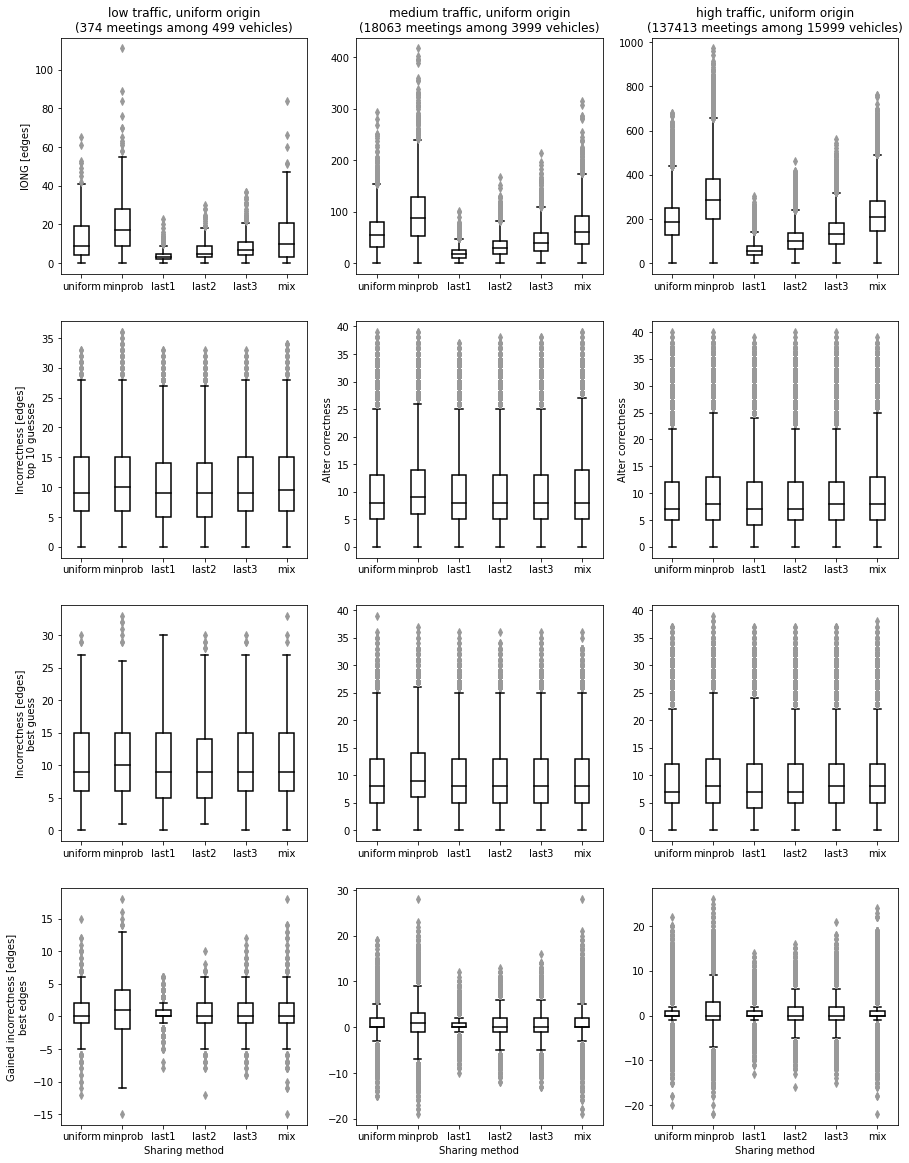

In [7]:
fig, ax = plt.subplots(4, 3, figsize=[15, 20])

for i, (path_suffix, label) in enumerate(uniforms):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=0.35, color="white", saturation=1.0, ax=ax[0,i])

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[0,i].lines, color='k')

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG [edges]")
        
    ########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=0.35, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[2,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=0.35, saturation=0.8, ax=ax[2,i])
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[2,i].lines, color='k')

    if i==0:
        ax[2,i].set_ylabel("Incorrectness [edges]\nbest guess")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_xlabel("")
    
    ########################
    #Gained correctness:
    ax[3,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=0.35, saturation=0.8, ax=ax[3,i])
    plt.setp(ax[3,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[3,i].lines, color='k')

    ax[3,i].set_xlabel("Sharing method")
    if i==0:
        ax[3,i].set_ylabel("Gained incorrectness [edges]\nbest edges")
    else:
        ax[3,i].set_ylabel("")

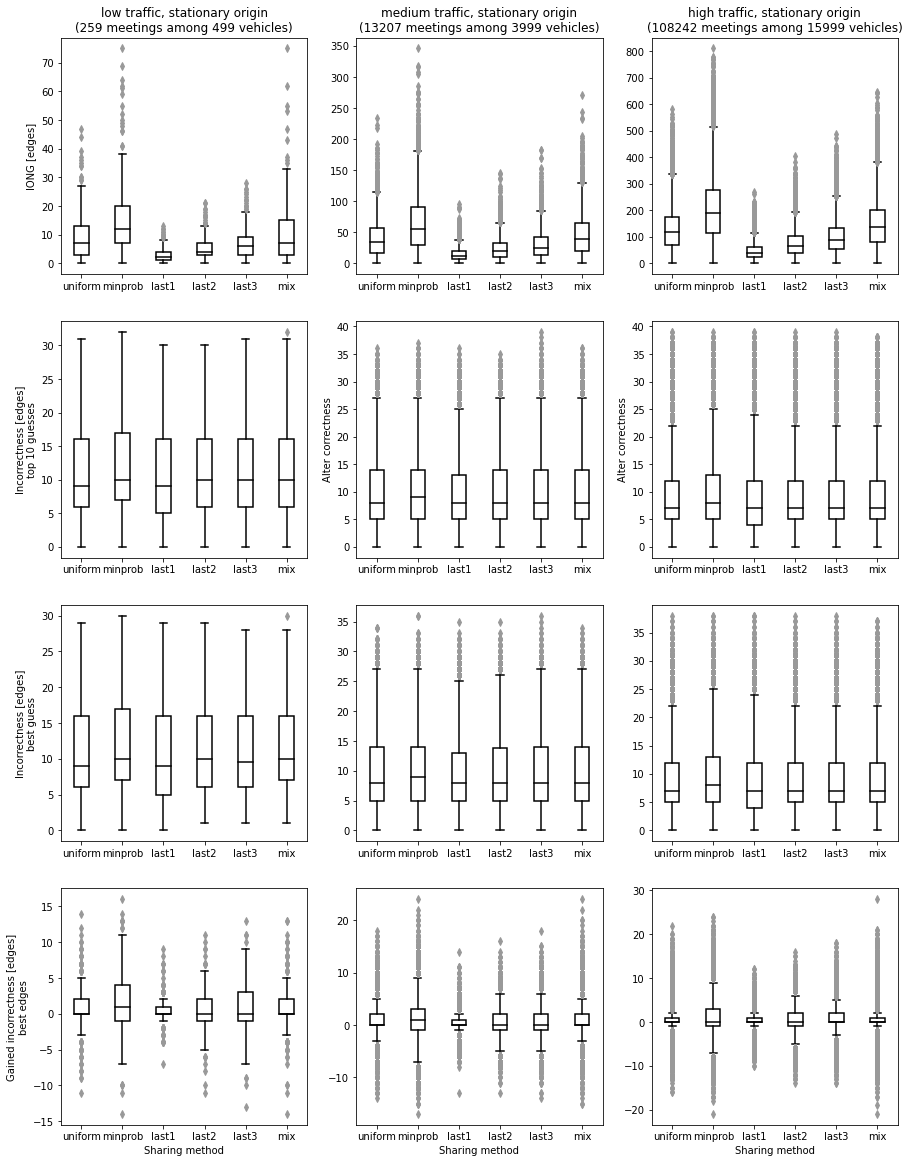

In [8]:
fig, ax = plt.subplots(4, 3, figsize=[15, 20])

for i, (path_suffix, label) in enumerate(stationaries):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=0.35, color="white", saturation=1.0, ax=ax[0,i])

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[0,i].lines, color='k')

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG [edges]")
        
    ########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=0.35, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[2,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=0.35, saturation=0.8, ax=ax[2,i])
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[2,i].lines, color='k')

    if i==0:
        ax[2,i].set_ylabel("Incorrectness [edges]\nbest guess")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_xlabel("")
    
    ########################
    #Gained correctness:
    ax[3,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=0.35, saturation=0.8, ax=ax[3,i])
    plt.setp(ax[3,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[3,i].lines, color='k')

    ax[3,i].set_xlabel("Sharing method")
    if i==0:
        ax[3,i].set_ylabel("Gained incorrectness [edges]\nbest edges")
    else:
        ax[3,i].set_ylabel("")